In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga del dataset
df = pd.read_csv('PFDA_People_analytics.csv',sep=";")

### a) Exploración inicial del dataset

In [ ]:
# Dimensiones
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (1470, 36)


El dataset contiene 1470 filas y 36 columnas. Cada fila representa un empleado, con información demográfica, laboral y de satisfacción.

In [ ]:
# Primeras filas
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1.0,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4.0,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2.0,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3.0,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4.0,80,1,6,3,3,2,2,2,2


Al ejecutar df.head(), se observan las primeras filas del dataset, lo que nos permite identificar la estructura general de los datos.
Se aprecia que el dataset contiene información por empleado, donde cada fila representa un trabajador distinto y cada columna, una característica asociada a él (edad, departamento, satisfacción, ingresos, etc.).

**Se pueden observar algunas variables que podrían no aportar valor analítico:**

* **Unnamed:0** parece ser una columna generada automáticamente al exportar el archivo (índice adicional).

* **EmployeeCount y StandardHours:** Contienen valores constantes, por lo que podrían eliminarse en etapas posteriores del análisis.

* **Over18:** si todos los empleados son mayores de edad, también será una columna redundante.

In [ ]:
#Columnas existentes
print("Columnas:")
print(df.columns.tolist())


Columnas:
['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Al listar las columnas del dataset mediante df.columns.tolist(), podemos observar que el conjunto de datos cuenta con 36 variables. Estas columnas representan distintas características relacionadas con los empleados de una empresa, tanto a nivel personal como laboral.

**Entre las más relevantes tenemos:**

* Age, que indica la edad del empleado.

* Attrition, que señala si el empleado ha dejado la empresa o no (Yes or No).

* Department, JobRole y BusinessTravel, que reflejan información sobre el puesto y condiciones laborales.

* MonthlyIncome, DailyRate y HourlyRate, que se relacionan con la compensación económica.

* YearsAtCompany, TotalWorkingYears y YearsSinceLastPromotion, asociadas a la experiencia laboral.

* Además, hay columnas sobre la satisfacción y el equilibrio trabajo-vida, como JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction y WorkLifeBalance.

In [ ]:
# Tipos de datos y resumen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvol

**Cantidad de datos no nulos:**
La mayoría de las columnas presentan 1470 valores no nulos, lo cual sugiere que el dataset está bastante completo.

**Sin embargo, existen dos columnas con algunos valores faltantes:**
* **OverTime:** 1440 valores no nulos.

* **RelationshipSatisfaction:** 1440 valores no nulos.
Esto significa que faltan datos en aproximadamente 30 registros de cada una, algo a considerar antes del análisis estadístico.

**Tipos de datos presentes:**

* **Numéricos (int64, float64):** 27 columnas.
Incluyen variables como Age, MonthlyIncome, YearsAtCompany, DailyRate, etc.

* **Categóricas (object):** 9 columnas.
Entre ellas se encuentran Attrition, Gender, Department, JobRole y BusinessTravel.

**Columnas posiblemente irrelevantes:**

* **Unnamed:** 0 es un índice adicional sin valor analítico.

* **EmployeeCount y StandardHours** A simple vista parece tener valores constantes.

* **Over18** podría no aportar información útil, ya que todos los registros probablemente son mayores de edad.

**Memoria utilizada:**
El DataFrame ocupa aprox 414 KB, un tamaño manejable para análisis de datos en memoria.

In [ ]:
# Estadísticas descriptivas generales de columnas numéricas para conocer la estructura del dataset
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1440.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.711111,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.077866,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Rangos de valores generales:**

* La **edad (Age)** de los empleados varía entre 18 y 60 años, con una media cercana a 37, lo que nos indica que en su mayoría son personas jóvenes.

* La variable **DistanceFromHome** está entre 1 y 29, posiblemente representando kilómetros o una escala similar.

**Variables constantes:**

* **EmployeeCount** y **StandardHours** tienen una desviación estándar igual a 0, lo que significa que todos los registros tienen el mismo valor. Estas columnas no aportan información útil para el análisis y podrían eliminarse.

**Valores mínimos y máximos llamativos:**
* Algunas variables presentan valores extremos como 0 en T**otalWorkingYears, YearsAtCompany o YearsSinceLastPromotion**. Esto podría representar empleados nuevos o registros de ingreso reciente, pero también conviene verificar que no se trate de errores de captura.

**Escalas de satisfacción y desempeño:**
* Las variables **EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction o PerformanceRating** parecen medirse en escalas del 1 al 4 o 1 al 5, lo que indica que son indicadores ordinales (de baja a alta satisfacción o desempeño).

In [ ]:
#Análisis de columna DailyRate - Salario diario
df['DailyRate']

,DailyRate
0,1102
1,279
2,1373
3,1392
4,591
...,...
1465,884
1466,613
1467,155
1468,1023


In [ ]:
df['DailyRate'].describe()

,DailyRate
count,1470.000000
mean,802.485714
std,403.509100
min,102.000000
25%,465.000000
50%,802.000000
75%,1157.000000
max,1499.000000


Corresponde al salario diario. Es numérica y no presenta símbolos de moneda, por lo que no necesita limpieza.
Tiene una gran variabilidad (entre 100 y 1500 aprox.), lo que indica distintos niveles de remuneración según el puesto.

### b) Evaluación de calidad de datos


In [ ]:
#Revisión de duplicados
df.duplicated().sum()

np.int64(0)

Al verificar si existen registros duplicados en el dataset, se observó que no hay filas completas repetidas.

In [ ]:
#Verificamos que no haya registros duplicados del mismo empleado según su identificador único
df['EmployeeNumber'].duplicated().sum()

np.int64(0)

No existen registros duplicados de un cliente por tanto cada empleado tiene un código único.

In [ ]:
# Verificamos si existen valores negativos en las columnas numéricas relevantes
(df[['Age', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears',
     'YearsAtCompany', 'YearsSinceLastPromotion', 'DistanceFromHome']] < 0).sum()

,0
Age,0
DailyRate,0
MonthlyIncome,0
TotalWorkingYears,0
YearsAtCompany,0
YearsSinceLastPromotion,0
DistanceFromHome,0


Podemos observar que las columnas numericas no poseen valores negativos que puedan afectar al análisis.

In [ ]:
#Ánalisis de valores nulos
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


**OverTime y RelationshipSatisfaction**
* Ambas presentan 30 valores faltantes, equivalentes a aproximadamente 2% del total de registros.
Este porcentaje es bajo, por lo que no representa un problema crítico; sin embargo, es importante decidir cómo tratarlos (por ejemplo, eliminarlos o imputar valores según la moda o media de cada variable).

In [ ]:
#Revisión general de variables numéricas para verificar posibles outliers
df[['DailyRate', 'MonthlyIncome', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsSinceLastPromotion', 'DistanceFromHome']].describe()

,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,6502.931293,11.279592,7.008163,2.187755,9.192517
std,403.509100,4707.956783,7.780782,6.126525,3.222430,8.106864
min,102.000000,1009.000000,0.000000,0.000000,0.000000,1.000000
25%,465.000000,2911.000000,6.000000,3.000000,0.000000,2.000000
50%,802.000000,4919.000000,10.000000,5.000000,1.000000,7.000000
75%,1157.000000,8379.000000,15.000000,9.000000,3.000000,14.000000
max,1499.000000,19999.000000,40.000000,40.000000,15.000000,29.000000


DailyRate y MonthlyIncome, con rangos muy amplios entre el mínimo y máximo.

TotalWorkingYears, YearsAtCompany y YearsSinceLastPromotion, tienen valor 0 como mínimo.

**Mejoras al DataSet** (*Para mejorar* la calidad del análisis exploratorio)






**1. Eliminar columnas sin valor analítico**

In [ ]:
df.drop(columns=['Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

  Se eliminaron las columnas Unnamed:0, EmployeeCount, StandardHours y Over18 debido a que contienen valores constantes o no aportan información relevante para el análisis.

**2. Tratar valores nulos**

In [ ]:
df['OverTime'].fillna(df['OverTime'].mode()[0], inplace=True)
df['RelationshipSatisfaction'].fillna(df['RelationshipSatisfaction'].mode()[0], inplace=True)

/tmp/ipython-input-2891483541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OverTime'].fillna(df['OverTime'].mode()[0], inplace=True)
/tmp/ipython-input-2891483541.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

  Los valores faltantes en OverTime y RelationshipSatisfaction fueron imputados con la moda, dado que el porcentaje de nulos era bajo y ambas variables son categóricas/ordinales.

**3. Detección más precisa de outliers**

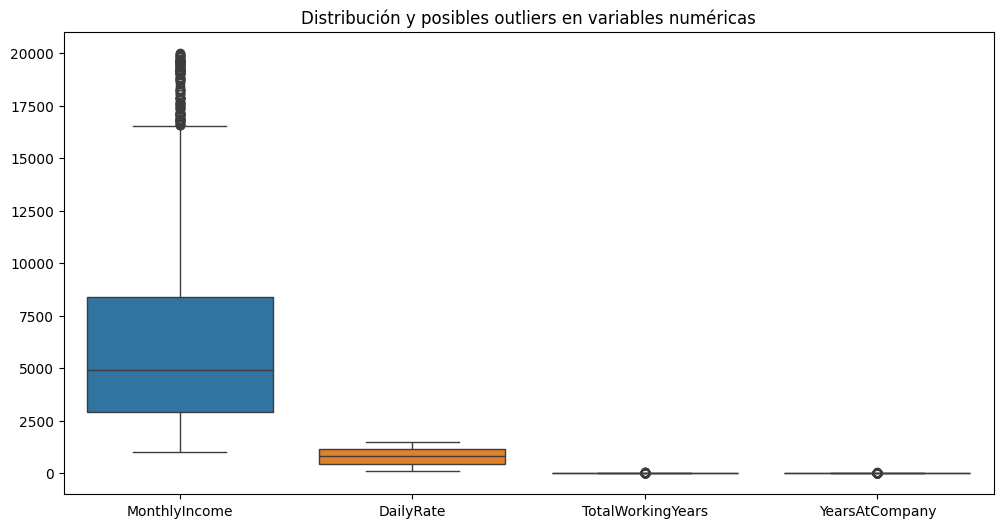

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['MonthlyIncome','DailyRate','TotalWorkingYears','YearsAtCompany']])
plt.title('Distribución y posibles outliers en variables numéricas')
plt.show()

El gráfico de boxplots muestra la distribución de las variables MonthlyIncome, DailyRate, TotalWorkingYears y YearsAtCompany. Se observan outliers principalmente en MonthlyIncome, reflejando diferencias salariales entre cargos o niveles jerárquicos. En cambio, las demás variables presentan una distribución más uniforme, con pocos valores extremos. Esto sugiere que la presencia de outliers responde a la variabilidad natural de los datos y no a errores en el registro.

***Cálculo de Outliers por Fórmula (Método del Rango Intercuartílico — IQR)***

In [ ]:
variables = ['MonthlyIncome', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany']

for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = ((df[var] < lim_inf) | (df[var] > lim_sup)).sum()
    print(f"{var}: {outliers} outliers detectados (Límites: {round(lim_inf,2)} - {round(lim_sup,2)})")

MonthlyIncome: 114 outliers detectados (Límites: -5291.0 - 16581.0)
DailyRate: 0 outliers detectados (Límites: -573.0 - 2195.0)
TotalWorkingYears: 63 outliers detectados (Límites: -7.5 - 28.5)
YearsAtCompany: 104 outliers detectados (Límites: -6.0 - 18.0)


Aplicando el método del rango intercuartílico (IQR), se identificaron diferencias naturales dentro de la fuerza laboral:

*   MonthlyIncome (114 outliers): reflejan variaciones salariales significativas entre puestos, niveles jerárquicos y antigüedad, evidenciando empleados con ingresos muy altos o especializados, más que errores de registro.
*   TotalWorkingYears (63) y YearsAtCompany (104 outliers): corresponden a trayectorias laborales extensas o poco comunes, propias de trabajadores con muchos años de experiencia o permanencia en la empresa.
*  DailyRate (0 outliers): presenta una distribución estable, probablemente asociada a escalas salariales fijas o políticas internas uniformes.

En general, los valores atípicos detectados reflejan la diversidad y estructura real del personal, no inconsistencias en los datos.



### c) Análisis de distribución de variables

**1. Distribución de la edad de los empleados**

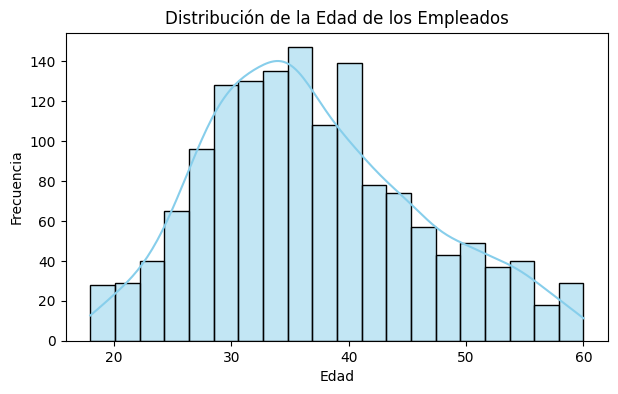

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

La variable Age presenta una distribución aproximadamente normal, concentrada entre los 30 y 40 años. Esto indica que la mayoría de empleados se encuentra en una etapa laboral activa y con experiencia, mientras que hay menos trabajadores jóvenes o mayores.

La variable Age presenta una distribución aproximadamente normal, concentrada entre los 30 y 40 años. Esto indica que la mayoría de empleados se encuentra en una etapa laboral activa y con experiencia, mientras que hay menos trabajadores jóvenes o mayores.

**2. Distribución del ingreso mensual**

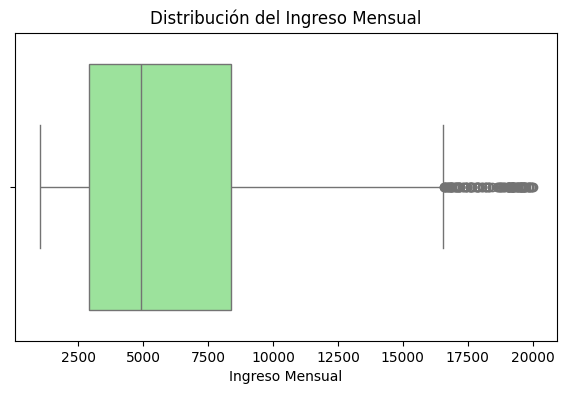

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['MonthlyIncome'], color='lightgreen')
plt.title('Distribución del Ingreso Mensual')
plt.xlabel('Ingreso Mensual')
plt.show()

El boxplot muestra un sesgo positivo, con la mayoría de empleados percibiendo ingresos bajos o medios y unos pocos con sueldos significativamente altos. Los valores extremos reflejan cargos jerárquicos o técnicos especializados dentro de la organización.

**3. Rotación según el nivel de Satisfacción Laboral**

/tmp/ipython-input-1272840302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='JobSatisfaction', y='Attrition', data=rotacion_satisf, palette='viridis')


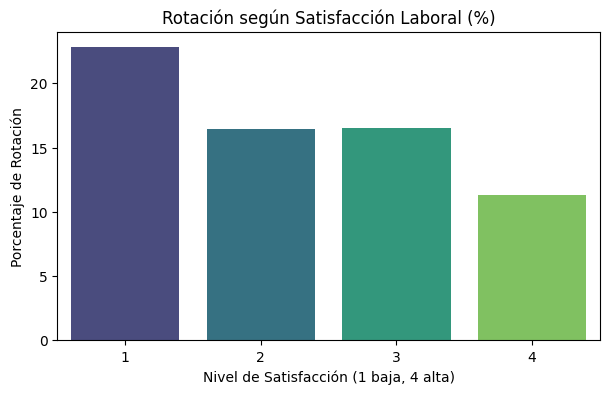

In [ ]:
rotacion_satisf = df.groupby('JobSatisfaction')['Attrition'].apply(lambda x: (x=='Yes').mean()*100).reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='JobSatisfaction', y='Attrition', data=rotacion_satisf, palette='viridis')
plt.title('Rotación según Satisfacción Laboral (%)')
plt.xlabel('Nivel de Satisfacción (1 baja, 4 alta)')
plt.ylabel('Porcentaje de Rotación')
plt.show()

A medida que el nivel de satisfacción aumenta, la tasa de salida disminuye.
Los empleados con satisfacción baja (nivel 1) presentan una rotación cercana al 22%, mientras que aquellos con satisfacción alta (nivel 4) apenas superan el 10%.
Este patrón sugiere que la satisfacción laboral es un factor clave que influye directamente en la permanencia del personal dentro de la organización.

**4. Permanencia o salida según Ingreso Mensual**


/tmp/ipython-input-1447407873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='viridis')


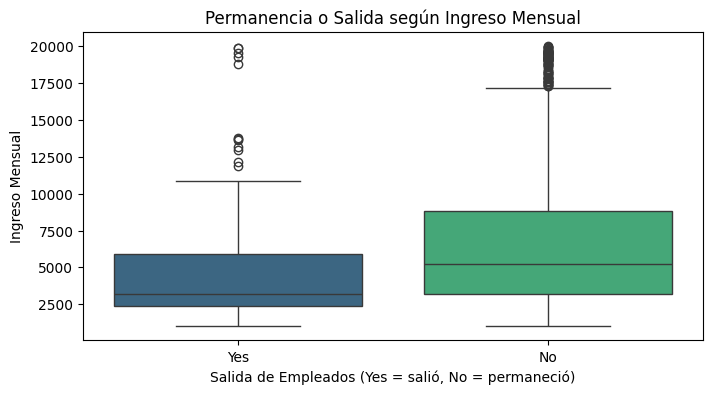

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='viridis')
plt.title('Permanencia o Salida según Ingreso Mensual')
plt.xlabel('Salida de Empleados (Yes = salió, No = permaneció)')
plt.ylabel('Ingreso Mensual')
plt.show()

El gráfico evidencia que el nivel de ingreso influye en la permanencia de los empleados: los salarios bajos se asocian a una mayor probabilidad de salir, mientras que los ingresos medios o altos se relacionan con permanecer en la empresa.

***Conclusión general***

El análisis evidencia una fuerza laboral joven-adulta y con experiencia moderada, concentrada entre los 30 y 40 años. Los ingresos presentan una amplia dispersión, predominando los rangos medios, aunque existen grupos con salarios altos asociados a cargos especializados. Además, se observa que la satisfacción laboral y el nivel de ingresos influyen directamente en la retención del personal: quienes tienen mayor satisfacción o mejores ingresos muestran una menor tasa de rotación. En conjunto, los resultados reflejan una organización equilibrada y diversa, donde los factores económicos y motivacionales desempeñan un papel clave en la estabilidad del talento humano.

### d) Propuestas de análisis

Se plantearon dos posibles líneas de análisis orientadas a comprender los factores que influyen en la decisión de un empleado de permanecer o abandonar la organización.

**Factores demográficos asociados a la renuncia**, enfocados en analizar cómo variables como la edad, el género, el estado civil y los años en la empresa se relacionan con la probabilidad de salida. Esta línea busca identificar perfiles poblacionales con mayor tendencia a la rotación.

**Factores económicos y de trayectoria laboral, orientados a evaluar el impacto del ingreso, la antigüedad, el nivel de puesto y el desarrollo profesional en la decisión de renunciar**. Su finalidad es determinar si aspectos como el salario, los ascensos o el crecimiento influyen en la permanencia del personal.

### e) Desarrollo de insights y conclusiones

**Relación entre Horas Extra (OverTime) y Renuncias (Attrition)**



/tmp/ipython-input-3733671262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


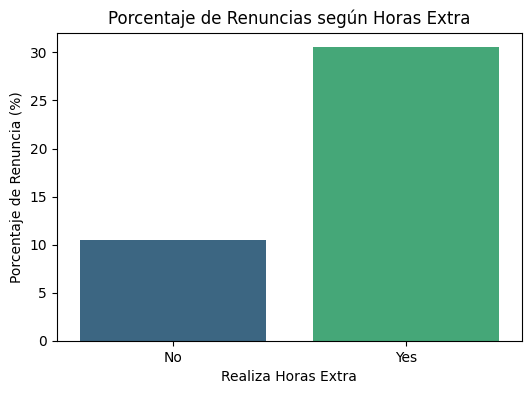

In [ ]:
plt.figure(figsize=(6,4))

rate = df.groupby('OverTime')['Attrition'].apply(lambda x: (x=='Yes').mean()*100).reset_index()

sns.barplot(
    data=rate,
    x='OverTime',
    y='Attrition',
    palette='viridis'
)

plt.title('Porcentaje de Renuncias según Horas Extra')
plt.xlabel('Realiza Horas Extra')
plt.ylabel('Porcentaje de Renuncia (%)')

plt.show()


**Insight 1:**
**Los empleados que realizan horas extra con mayor frecuencia presentan una probabilidad más alta de renunciar en comparación con quienes no trabajan fuera de su horario regular.**

Este patrón indica que el aumento de horas extra puede generar agotamiento, sensación de sobrecarga y una disminución del equilibrio entre la vida personal y laboral. Como resultado, el riesgo de salida voluntaria incrementa de forma notable.

*  El exceso de horas extra actúa como un factor de riesgo directo relacionado con mayores tasas de renuncia.
*   A medida que aumentan las cargas laborales extendidas, también aumenta el desgaste, lo cual impulsa la intención de abandonar la empresa.
*  Es un indicador crítico para Recursos Humanos, ya que puede monitorearse y gestionarse de manera inmediata para reducir la rotación.



**Relación entre renuncias y edad**

/tmp/ipython-input-2886806805.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('AgeGroup')['Attrition'].apply(lambda x: (x=='Yes').mean()*100).reset_index()
/tmp/ipython-input-2886806805.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_attrition, x='AgeGroup', y='Attrition', palette='viridis')


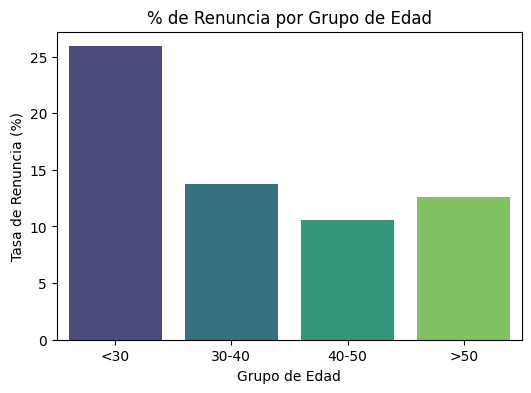

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 40, 50, 100],
                        labels=['<30', '30-40', '40-50', '>50'])

age_attrition = df.groupby('AgeGroup')['Attrition'].apply(lambda x: (x=='Yes').mean()*100).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=age_attrition, x='AgeGroup', y='Attrition', palette='viridis')
plt.title('% de Renuncia por Grupo de Edad')
plt.ylabel('Tasa de Renuncia (%)')
plt.xlabel('Grupo de Edad')
plt.show()

**Insight 2:** **El grupo de empleados menores de 30 años presenta la tasa de renuncia más alta, superando el 25%.**

En contraste, la rotación en los grupos de mayor edad se mantiene en niveles más bajos y estables.

Este patrón indica que los jóvenes optan por buscar otras oportunidades y podría presentar un problema de retención de talento joven para la empresa, mientras que el personal de mediana y mayor edad muestra una mayor estabilidad y compromiso a largo plazo.

**Relación entre Ingresos, Género y renuncias**

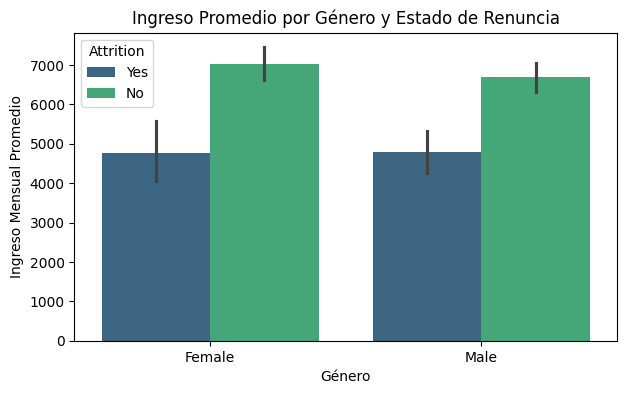

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Gender', y='MonthlyIncome', hue='Attrition', palette='viridis')
plt.title('Ingreso Promedio por Género y Estado de Renuncia')
plt.xlabel('Género')
plt.ylabel('Ingreso Mensual Promedio')
plt.show()

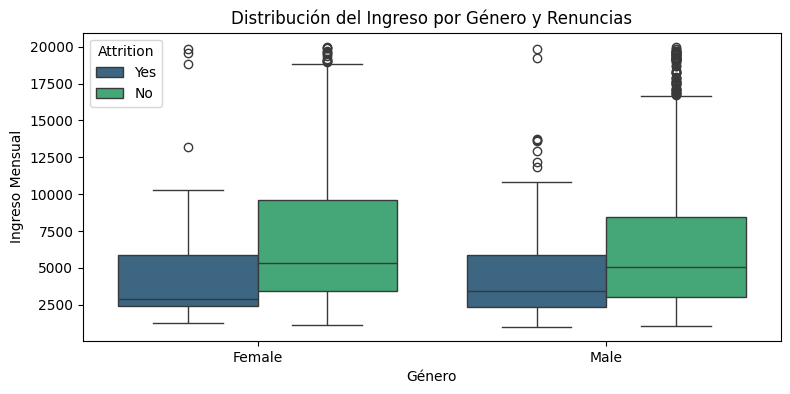

In [ ]:
plt.figure(figsize=(9,4))
sns.boxplot(
    data=df,
    x='Gender',
    y='MonthlyIncome',
    hue='Attrition',
    palette='viridis'
)
plt.title('Distribución del Ingreso por Género y Renuncias')
plt.xlabel('Género')
plt.ylabel('Ingreso Mensual')
plt.show()

**Insight 3:**
**El factor más relevante para la rotación no es el género, sino su salario:** Independientemente de si son hombres o mujeres, quienes renuncian a la empresa son consistentemente aquellos que tienen los ingresos más bajos, en comparación directa con sus pares que deciden quedarse.

Este patrón establece que el bajo ingreso es una causa fundamental y universal de la rotación de personal en la organización, afectando por igual a ambos géneros en la base salarial.

**Balance Vida–Trabajo (WorkLifeBalance) vs Renuncias (Attrition)**

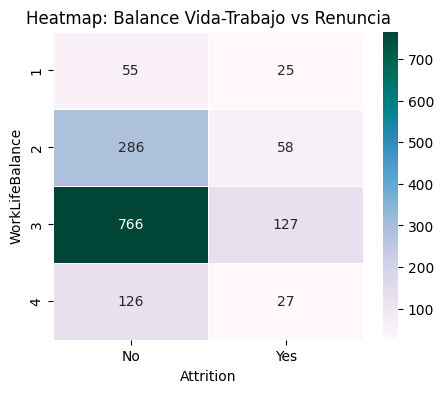

In [ ]:
plt.figure(figsize=(5,4))

heatmap_data = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='PuBuGn',
    linewidths=0.5,
    linecolor='white'
)

plt.title('Heatmap: Balance Vida-Trabajo vs Renuncia')
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.show()


**Insight 4**:
**El núcleo de empleados más leal y estable es aquel que reporta un balance vida-trabajo de Nivel 3 (Bueno).**

Este grupo no solo es el más grande de la empresa (766 empleados que se quedan), sino que también tiene la tasa de renuncia más baja de todas (14.2%).

El desgaste no se activa en este nivel; al contrario, este es el nivel más estable y leal.

El "desgaste crítico" ocurre en el Nivel 1, donde 1 de cada 3 empleados renuncia (31.3%).



**Permanencia en la empresa según los años de Experiencia**

/tmp/ipython-input-2973300276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='viridis')


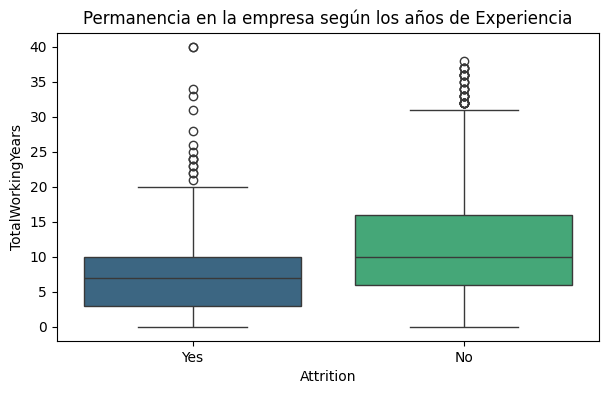

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', palette='viridis')
plt.title('Permanencia en la empresa según los años de Experiencia')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.show()

**Insight 5:**
**El factor principal de riesgo en la rotación se relaciona con la etapa de carrera**

Los empleados que se van, son aquellos que tienen una trayectoria profesional significativamente más corta, lo cual es un hallazgo que refuerza y consolida la tendencia ya observada de que los jóvenes y los que ganan menos son los más propensos a renunciar.